Data as of:
http://p.migdal.pl/matrix-decomposition-viz/

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch.nn import Parameter
from torch.autograd import Variable

In [2]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
cities = ["Toronto", "Warsaw", "Boston", "London", "San Francisco", "Jerusalem", "Mexico", "Cape Town", "Sydney"]
avg_temp = np.array([
    [-5.8, -3.1, 4.5, 6.7, 14.3, 18.2, 20.1, 20.6, 15.9, 11.2, 3.6, -7.2],
    [-2.9, 3.6, 4.2, 9.7, 16.1, 19.5, 20.0, 18.8, 16.4, 7.6, 3.2, 1.3],
    [0.3, 1.5, 5.9, 8.4, 14.8, 20.2, 24.5, 24.7, 19.7, 13.0, 7.9, 1.9],
    [2.3, 6.5, 8.7, 9.2, 12.3, 15.4, 17.3, 20.0, 14.8, 10.8, 8.7, 6.4],
    [11.5, 13.9, 14.3, 15.7, 16.3, 17.4, 17.2, 17.7, 18.2, 17.4, 14.6, 10.4],
    [9.7, 10.3, 12.7, 15.5, 21.2, 22.1, 24.1, 25.3, 23.5, 20.1, 15.7, 11.8],
    [14.0, 15.6, 17.5, 20.3, 20.6, 18.1, 17.6, 18.2, 17.8, 16.8, 14.9, 16.0],
    [23.1, 23.3, 21.4, 19.0, 17.1, 15.5, 15.4, 15.6, 15.4, 18.6, 20.9, 21.3],
    [23.8, 24.6, 23.4, 20.8, 18.1, 15.1, 14.4, 14.5, 17.3, 19.0, 21.8, 24.3]
])

In [3]:
df = pd.DataFrame(avg_temp, index=cities, columns=months)

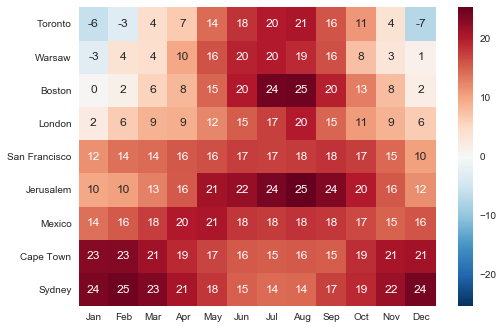

In [4]:
sns.heatmap(df, annot=True, fmt='.0f')

In [5]:
df.values.shape

(9, 12)

## Exercise

Using PyTorch, perform matrix decomposition.

Hints:

* matrix product
* MSELoss

In [6]:
class Factorize(nn.Module):
    
    def __init__(self, factors=2):
        super().__init__()
        self.A = Parameter(torch.randn(9, factors))
        self.B = Parameter(torch.randn(factors, 12))
    
    def forward(self):
        output = self.A.matmul(self.B)
        return output

In [7]:
model = Factorize(factors=2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.9188, -0.7223],
         [ 0.7905,  1.2306],
         [-0.4325,  1.1549],
         [-0.5817,  0.2422],
         [ 1.1478,  0.8516],
         [-0.6358, -0.6343],
         [ 0.3884, -1.2657],
         [-0.6069,  0.6357],
         [-0.7646, -1.1579]]), Parameter containing:
 tensor([[ 2.6618, -0.9080,  0.6463, -0.4627, -1.1440,  0.1485, -0.3536,
          -0.2157,  0.2616,  1.0260, -0.6168,  0.6159],
         [ 2.0844, -0.2454, -0.2310,  1.9591,  1.1290,  0.7894, -0.9948,
          -1.9830,  0.2600, -0.2778, -1.8799,  0.0551]])]

In [9]:
desired_output = Variable(torch.FloatTensor(df.values))

loss2 = []
for i in range(10000):
    optimizer.zero_grad()
    output = model()
    
    loss = criterion(output, desired_output)
    loss2.append(loss.item())
    loss.backward()        

    optimizer.step()

Loss at the end: 1.32


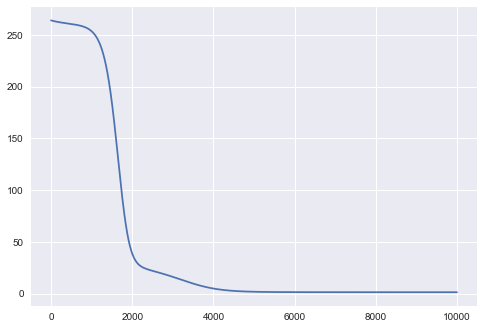

In [10]:
print("Loss at the end: {:.2f}".format(loss2[-1]))
plt.plot(range(len(loss2)), loss2)

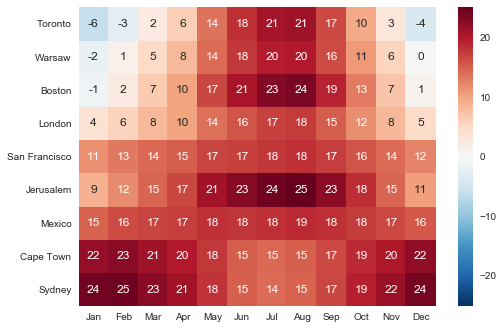

In [11]:
avg_temp_pred = output.detach().numpy()
df2 = pd.DataFrame(avg_temp_pred, index=cities, columns=months)
sns.heatmap(df2, annot=True, fmt='.0f')

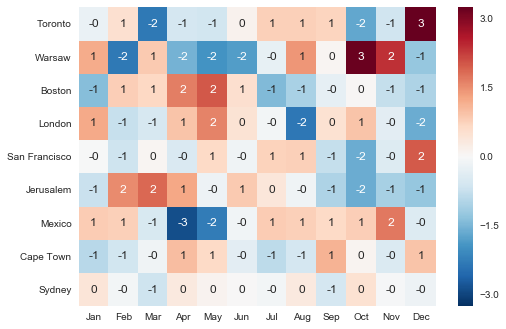

In [12]:
# differences
sns.heatmap(df2 - df, annot=True, fmt='.0f')

## Exercise 1

* Check how does it work with more and less dimensions
* Visualize for 2-d case for both cities and countries (make sure that a plot does have )
* Add global bias and bias for city temperatures. Now for n=1 see try to see if there is a pattern.

## Exercise 2

(In a new notebook)

Read http://blog.ethanrosenthal.com/2017/06/20/matrix-factorization-in-pytorch/.

* Use embeddings to performs the same task as in exercise 1.
* Then use random (but fixed) 1/2 data for training, and see predictions for the remaining 1/2 (validation).
* Plot error for training and validation errors as a function of dimensions (and on/off for city temp bias).